In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

TRAIN_DIR = 'mnist/input_data'
POS = 1
NEG = 7

%matplotlib inline

In [2]:
# Import MNIST data
mnist = input_data.read_data_sets(TRAIN_DIR, one_hot=True, validation_size=0)

Extracting mnist/input_data/train-images-idx3-ubyte.gz
Extracting mnist/input_data/train-labels-idx1-ubyte.gz
Extracting mnist/input_data/t10k-images-idx3-ubyte.gz
Extracting mnist/input_data/t10k-labels-idx1-ubyte.gz


(13007, 784) (2163, 784)


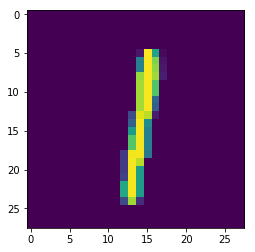

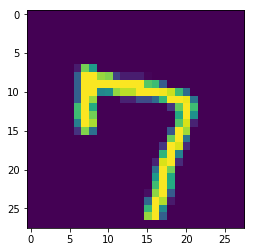

In [3]:
# Get only two digits from MNIST
def get_binary_mnist(subset, pos_label=POS, neg_label=NEG):
    X = []
    Y = []
    for i in range(subset.num_examples):
        x, y = subset.next_batch(1)
        if y.flatten()[pos_label] == 1:
            X.append(x.flatten())
            Y.append([1])
        elif y.flatten()[neg_label] == 1:
            X.append(x.flatten())
            Y.append([0])
    return np.asarray(X), np.asarray(Y)

X_train, Y_train = get_binary_mnist(mnist.train)
X_test, Y_test = get_binary_mnist(mnist.test)

print(X_train.shape, X_test.shape)

# Plot positive and negative example:
plt.imshow(X_train[np.argwhere(Y_train == 1)[0, 0]].reshape((28, 28)), interpolation="nearest", cmap="viridis")
plt.figure()
plt.imshow(X_train[np.argwhere(Y_train == 0)[0, 0]].reshape((28, 28)), interpolation="nearest", cmap="viridis")

In [28]:
# Create the model
x = tf.placeholder(tf.float32, [None, 28 * 28])
W = tf.Variable(tf.random_normal([28 * 28, 1], stddev=0.1))
b = tf.Variable(tf.zeros([1]))

# Logistic Regression Output (Sigmoid)
y = 1 / (1 + tf.exp(-tf.matmul(x, W) + b))

# Label
y_ = tf.placeholder(tf.float32, [None, 1])

# Binary Crossentropy
cross_entropy = -tf.reduce_mean(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y))

# Optimizer
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

In [29]:
# Training
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
batch_size = 256
n_epochs = 50
for e in range(n_epochs):
    for i in range(X_train.shape[0] // batch_size):
        batch_xs, batch_ys = X_train[i * batch_size:i * batch_size + batch_size], \
            Y_train[i * batch_size:i * batch_size + batch_size]
        sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    # Test current model
    y_pred = sess.run(y, feed_dict={x: X_test, y_: Y_test})
    print("Epoch: {}\t Test Accuracy: {}".format(e + 1, roc_auc_score(Y_test, y_pred)))

Epoch: 1	 Test Accuracy: 0.997309689916
Epoch: 2	 Test Accuracy: 0.998027048801
Epoch: 3	 Test Accuracy: 0.998340732615
Epoch: 4	 Test Accuracy: 0.998523286309
Epoch: 5	 Test Accuracy: 0.998659558786
Epoch: 6	 Test Accuracy: 0.998773547713
Epoch: 7	 Test Accuracy: 0.998845540719
Epoch: 8	 Test Accuracy: 0.998905534891
Epoch: 9	 Test Accuracy: 0.998959529646
Epoch: 10	 Test Accuracy: 0.999021237937
Epoch: 11	 Test Accuracy: 0.999071804453
Epoch: 12	 Test Accuracy: 0.999111229195
Epoch: 13	 Test Accuracy: 0.999144654519
Epoch: 14	 Test Accuracy: 0.999172937486
Epoch: 15	 Test Accuracy: 0.999199506334
Epoch: 16	 Test Accuracy: 0.999221789883
Epoch: 17	 Test Accuracy: 0.999244073433
Epoch: 18	 Test Accuracy: 0.99927064228
Epoch: 19	 Test Accuracy: 0.999295497009
Epoch: 20	 Test Accuracy: 0.99931435232
Epoch: 21	 Test Accuracy: 0.999330636452
Epoch: 22	 Test Accuracy: 0.999341778227
Epoch: 23	 Test Accuracy: 0.999355491181
Epoch: 24	 Test Accuracy: 0.999369204134
Epoch: 25	 Test Accuracy: 0

0.999693172663


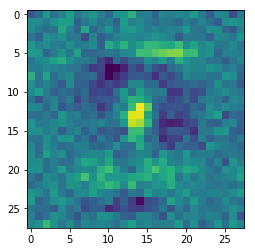

In [21]:
# Test trained model
y_pred = sess.run(y, feed_dict={x: X_test, y_: Y_test})
print(roc_auc_score(Y_test, y_pred))

plt.imshow(W.eval().reshape((28, 28)), interpolation="nearest", cmap="viridis")

In [71]:
print(cross_var, np.mean(caca_var))

0.169404 -0.169404


In [87]:
# Create the model
n_hidden = 32
x = tf.placeholder(tf.float32, [None, 28 * 28])
W1 = tf.Variable(tf.random_normal([28 * 28, n_hidden], stddev=0.1))
b1 = tf.Variable(tf.zeros([n_hidden]))
W2 = tf.Variable(tf.random_normal([n_hidden, 1], stddev=0.1))
b2 = tf.Variable(tf.zeros([1]))

# Logistic Regression Output (Sigmoid)
h = tf.nn.relu(tf.divide(1, 1 + tf.exp(-tf.matmul(x, W1) + b1)))
y = tf.divide(1, 1 + tf.exp(-tf.matmul(h, W2) + b2))

# Label
y_ = tf.placeholder(tf.float32, [None, 1])

# Binary Crossentropy
cross_entropy = -tf.reduce_mean(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y))

# Optimizer
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

0.979068890451


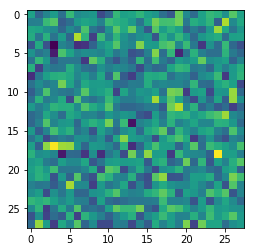

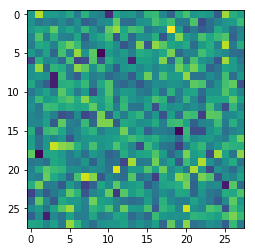

In [89]:
# Test trained model
y_pred = sess.run(y, feed_dict={x: X_test, y_: Y_test})
print(roc_auc_score(Y_test, y_pred))

plt.imshow(W1.eval()[:, 0].reshape((28, 28)), interpolation="nearest", cmap="viridis")
plt.figure()
plt.imshow(np.mean(W1.eval(), axis=1).reshape((28, 28)), interpolation="nearest", cmap="viridis")

In [4]:
# Create the model
n_hidden1 = 128
n_hidden2 = 128
x = tf.placeholder(tf.float32, [None, 28 * 28])
W1 = tf.Variable(tf.random_normal([28 * 28, n_hidden1], stddev=0.1))
b1 = tf.Variable(tf.zeros([n_hidden1]))
W2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2], stddev=0.1))
b2 = tf.Variable(tf.zeros([1]))
W3 = tf.Variable(tf.random_normal([n_hidden2, 1], stddev=0.1))
b3 = tf.Variable(tf.zeros([1]))


# Logistic Regression Output (Sigmoid)
h1 = tf.nn.relu(tf.divide(1, 1 + tf.exp(-tf.matmul(x, W1) + b1)))
h2 = tf.nn.relu(tf.divide(1, 1 + tf.exp(-tf.matmul(h1, W2) + b2)))
y = tf.divide(1, 1 + tf.exp(-tf.matmul(h2, W3) + b3))

# Label
y_ = tf.placeholder(tf.float32, [None, 1])

# Binary Crossentropy
cross_entropy = -tf.reduce_mean(y_ * tf.log(y) + (1 - y_) * tf.log(1 - y))

# Optimizer
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

0.988620819692


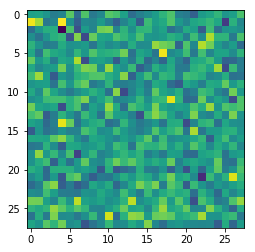

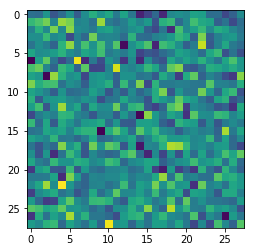

In [13]:
y_pred = sess.run(y, feed_dict={x: X_test, y_: Y_test})
print(roc_auc_score(Y_test, y_pred))

plt.imshow(W1.eval()[:, 0].reshape((28, 28)), interpolation="nearest", cmap="viridis")
plt.figure()
plt.imshow(np.mean(W1.eval(), axis=1).reshape((28, 28)), interpolation="nearest", cmap="viridis")

In [26]:
def linear(X, W, b):
    return np.dot(X, W) + b

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def loss(y, y_):
    return -np.mean(y_ * np.log(y) + (1 - y_) * np.log(1 - y))

def deriv_loss(y, y_, X, W, b):
    deriv_sigmoid = np.dot(sigmoid(linear(X, W, b)).T, (1 - sigmoid(linear(X, W, b))))
    return np.dot((X.T * deriv_sigmoid), (-y + y_) / (np.dot(np.transpose(y - 1), y)))

def sgd(W, dW, lr):
    return W - lr * dW

Epoch: 1	 Test Accuracy: 0.998359263256
Epoch: 2	 Test Accuracy: 0.99876149819
Epoch: 3	 Test Accuracy: 0.999032547706
Epoch: 4	 Test Accuracy: 0.999564169735
Epoch: 5	 Test Accuracy: 0.999701856042
Epoch: 6	 Test Accuracy: 0.999709447971
Epoch: 7	 Test Accuracy: 0.999671263709
Epoch: 8	 Test Accuracy: 0.99973241657
Epoch: 9	 Test Accuracy: 0.999785883879
Epoch: 10	 Test Accuracy: 0.999808803779


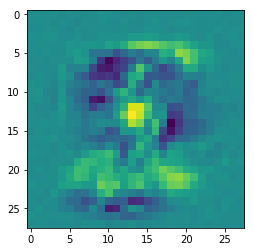

In [27]:
n_batch = 256
W = np.random.normal(scale=0.1, size=(28 * 28, 1))
b = 0
n_epochs = 10
lr = 0.1
for e in range(n_epochs):
    # Train
    for i in range(X_train.shape[0] // n_batch):
        X, Y_ = X_train[i * n_batch:i * n_batch + n_batch], \
            Y_train[i * n_batch:i * n_batch + n_batch]
        Y = sigmoid(linear(X, W, b))
        dW = deriv_loss(Y, Y_, X, W, b)
        W = sgd(W, dW, lr)
    
    # Test current model
    acc = []
    for i in range(X_test.shape[0] // n_batch):
        X, Y_ = X_test[i * n_batch:i * n_batch + n_batch], \
            Y_test[i * n_batch:i * n_batch + n_batch]
        Y_pred = sigmoid(linear(X, W, b))
        acc.append(roc_auc_score(Y_, Y_pred))
        
    plt.imshow(W.reshape((28, 28)), interpolation="nearest", cmap="viridis")
    print("Epoch: {}\t Test Accuracy: {}".format(e + 1, np.mean(acc)))